# Bruno Vieira 50046 - knn

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
path = r'C:\Users\utilizador\Documents\GitHub\psn\lab1\data\abalone.data'
df = pd.read_csv(path) 

In [3]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='M' else 0)

In [7]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


array([[<AxesSubplot:title={'center':'Rings'}>]], dtype=object)

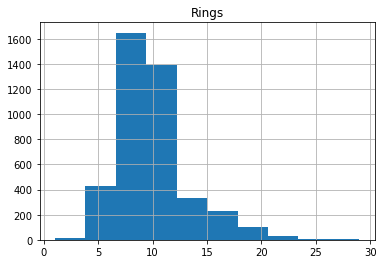

In [8]:
df.hist(column='Rings')

In [9]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [10]:
df['Rings'] = df['Rings'].apply(lambda x: 5  if x <= 5  else x)
df['Rings'] = df['Rings'].apply(lambda x: 20 if x >= 20 else x)

In [11]:
df['Rings'].value_counts().sort_index()

5     189
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     62
Name: Rings, dtype: int64

In [12]:
df['Rings'] = df['Rings'].apply(lambda x: x-4)
df['Rings'].value_counts().sort_index()

1     189
2     259
3     391
4     568
5     689
6     634
7     487
8     267
9     203
10    126
11    103
12     67
13     58
14     42
15     32
16     62
Name: Rings, dtype: int64

array([[<AxesSubplot:title={'center':'Rings'}>]], dtype=object)

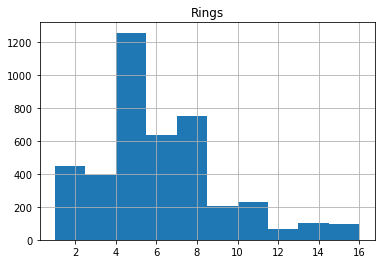

In [13]:
df.hist(column='Rings')

In [14]:
predictors = df.drop('Rings', axis=1)
predictors

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [15]:
classes = df.iloc[:,-1:]
classes

,Rings
0,11
1,3
2,5
3,6
4,3
...,...
4172,7
4173,6
4174,5
4175,6


In [16]:
X_train, X_test, y_train, y_test = train_test_split(predictors, classes, random_state=0)

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

C:\Users\utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [18]:
score_w_16_classes = knn.score(X_test, y_test)
score_w_16_classes

0.23732057416267943

In [19]:
df['Rings'].value_counts().sort_index()

1     189
2     259
3     391
4     568
5     689
6     634
7     487
8     267
9     203
10    126
11    103
12     67
13     58
14     42
15     32
16     62
Name: Rings, dtype: int64

In [20]:
df['Rings'] = df['Rings'].apply(lambda x: 1 if x <= 8-4 else x)
df['Rings'] = df['Rings'].apply(lambda x: 2 if x >= 9-4 and x <= 10-4 else x)
df['Rings'] = df['Rings'].apply(lambda x: 3 if x >= 11-4 else x)

In [21]:
df['Rings'].value_counts().sort_index()

1    1407
2    1323
3    1447
Name: Rings, dtype: int64

In [22]:
predictors = df.drop('Rings', axis=1)
predictors

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [23]:
classes = df.iloc[:,-1:]
classes

,Rings
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


In [24]:
X_train, X_test, y_train, y_test = train_test_split(predictors, classes, random_state=0)

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

C:\Users\utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [26]:
score_w_3_classes = knn.score(X_test, y_test)
score_w_3_classes

0.6267942583732058

In [27]:
print('Precision (%) with:\n\n16 classes: ' + "{:.1f}".format(score_w_16_classes*100) + '\n3 classes: ' + "{:.1f}".format(score_w_3_classes*100))

Precision (%) with:

16 classes: 23.7
3 classes: 62.7


In [28]:
df_first_5 = pd.DataFrame(columns=['Predicted', 'Class'])

for i in range(5):
    pred = knn.predict([X_test.iloc[i].tolist()])[0]
    classif = y_test.iloc[i]['Rings']
    neigs = knn.kneighbors(X_test.iloc[i].values.reshape(1, -1), n_neighbors=5)
    df_first_5 = df_first_5.append({'Predicted': pred, 'Class': classif}, ignore_index=True)
    
df_first_5

,Predicted,Class
0,3,3
1,1,1
2,2,3
3,1,1
4,3,3


In [29]:
predicted = [ knn.predict([X_test.iloc[i].tolist()])[0] for i in range(len(X_test.index)) ]
confusion_m = np.transpose(confusion_matrix(y_test, predicted))

df = pd.DataFrame(list(zip([1,2,3],confusion_m[0],confusion_m[1],confusion_m[2])),columns = ["actual/predicted",1,2,3])
df.set_index('actual/predicted', inplace=True)
df

,1,2,3
actual/predicted,,,
1,299,68,9
2,75,143,73
3,33,132,213


In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

C:\Users\utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.583732057416268

### Passamos de um score de, aproximadamente, 63% para um de 58%.
- É normal o score diminuir, visto que, estamos a treinar o nosso modelo apenas com um vizinho. Se o valor de k for demasiado baixo (o que é o caso), o modelo torna-se muito específico e falha ao generalizar.
- Ao termos k=1, o nosso modelo tende a ser sensível ao ruído. Se o vizinho for um outlier é mau. 

In [31]:
def train_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    return knn.score(X_test,y_test) 

C:\Users\utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\utilizador\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

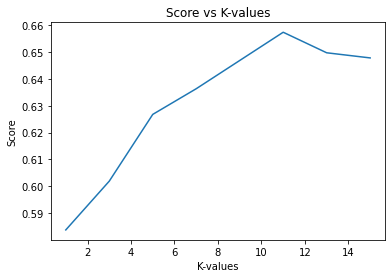

In [32]:
listK = [ i for i in range(0,16) if i%2 != 0 ]
scoreArray = [ train_knn(i) for i in listK ]

plt.plot(listK, scoreArray); plt.xlabel('K-values'); plt.ylabel('Score'); plt.title('Score vs K-values')
plt.show()

### Obtemos uma maior precisão quando k=11. 
- Apesar de a precisão ser maior, temos que ter em conta que, quanto maior for o k mais generalizado o nosso modelo vai ser. Enquanto que com k=1 podemos estar uma situação de overfitting, aqui podemos estar numa situação de underfitting.
- Nenhuma das situações é boa, pelo que devemos escolher o nosso valor k tal que não criemos um modelo nem muito nem pouco generalizado.